In [45]:
import pandas as pd
import geopandas
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

#Loading the Data
df = pd.read_csv("https://data.wprdc.org/datastore/dump/8d76ac6b-5ae8-4428-82a4-043130d17b02")
df = df.dropna()

#List
nbh = df['neighborhood'].value_counts().sort_values(ascending=True)
print(nbh)

Regent Square                  5
East Carnegie                 10
Mt. Oliver                    10
Ridgemont                     10
St. Clair                     11
                            ... 
Hazelwood                    213
South Side Flats             218
Central Business District    220
Squirrel Hill South          223
Carrick                      252
Name: neighborhood, Length: 90, dtype: int64


Text(0, 0.5, 'Number of Fires')

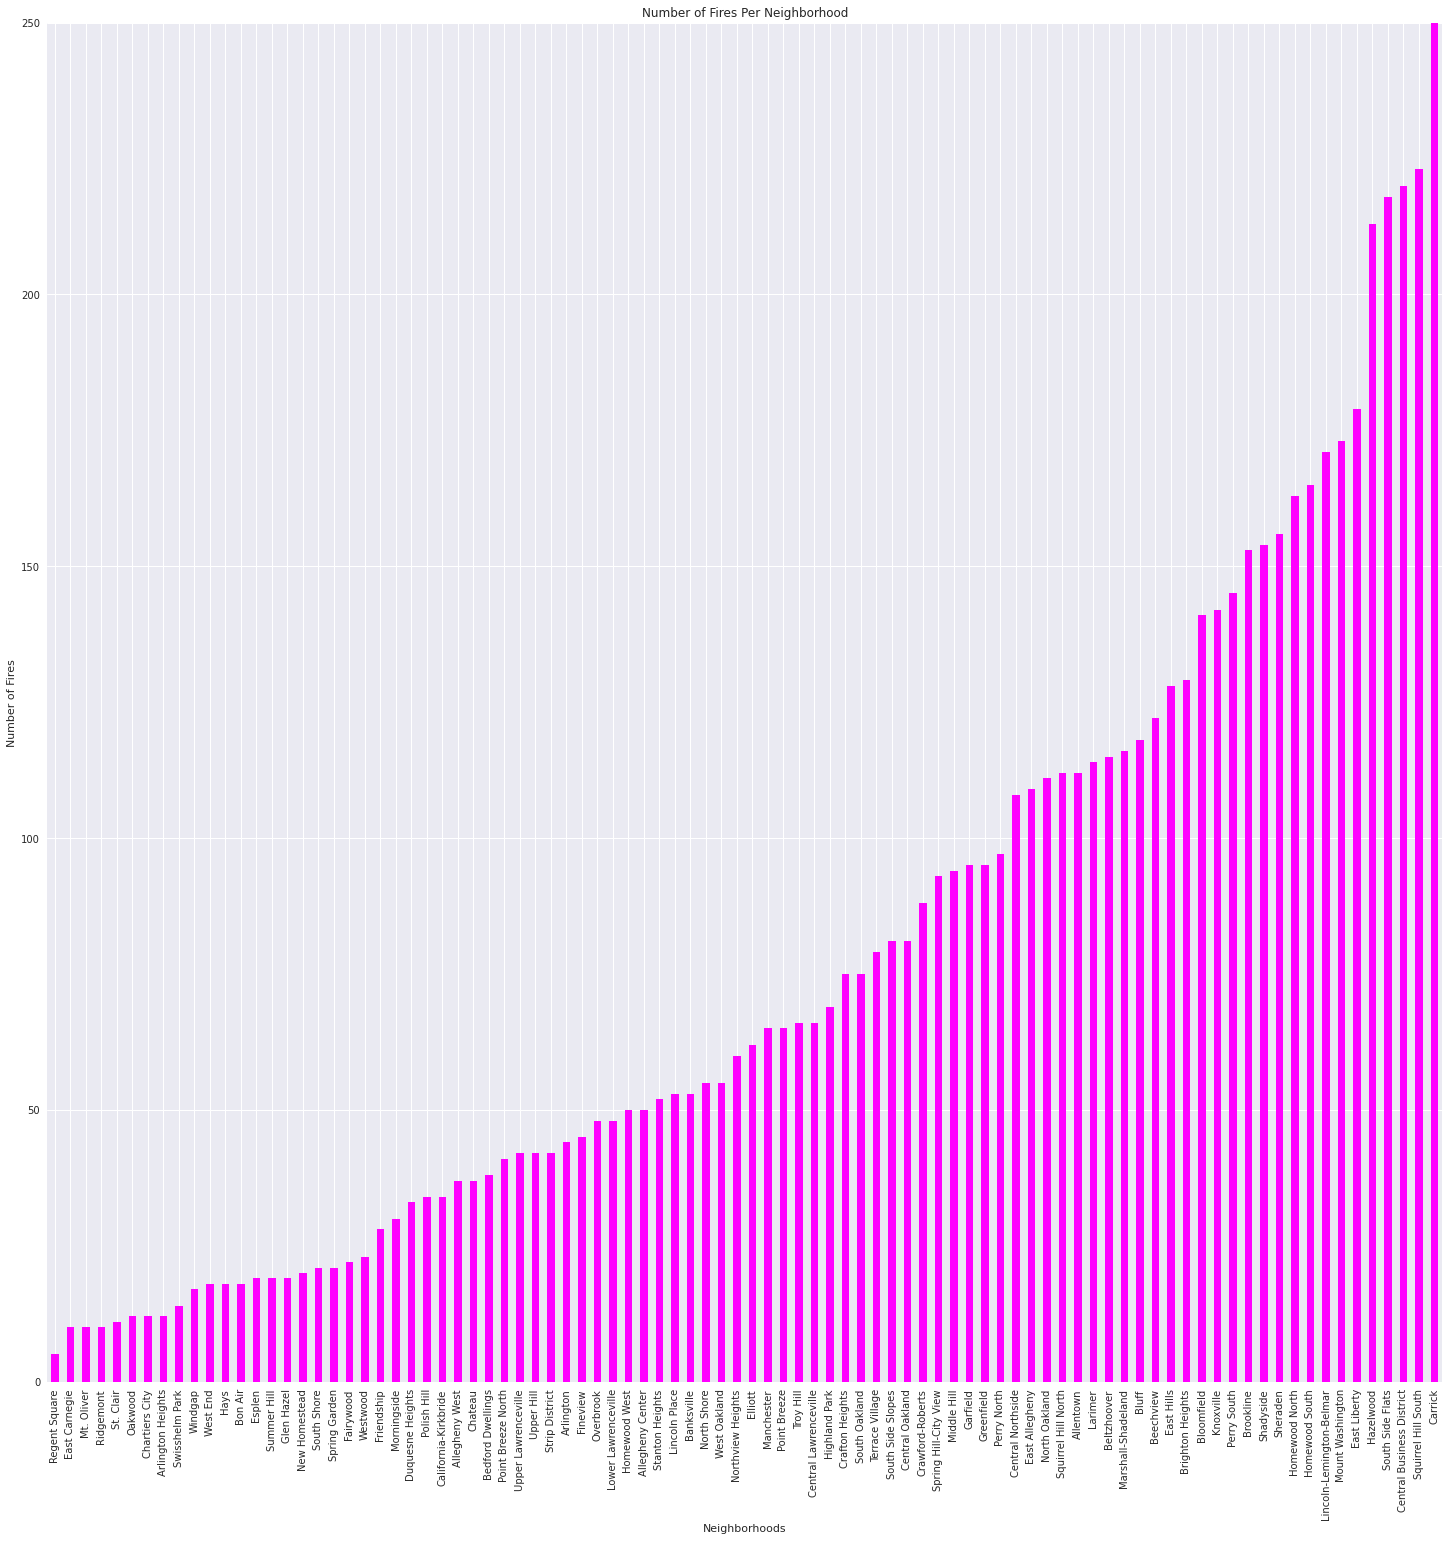

In [66]:
#Bar Graph
plt.style.use('seaborn')
nbh.plot.bar(figsize=(25,25), ylim=[0,250])
plt.title("Number of Fires Per Neighborhood")
plt.xlabel("Neighborhoods")
plt.ylabel("Number of Fires")

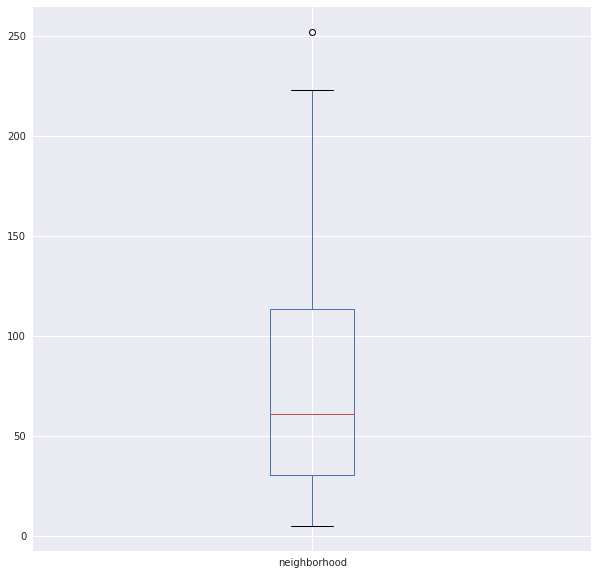

In [61]:
#Box Plot
nbh.plot.box(figsize=(10,10))

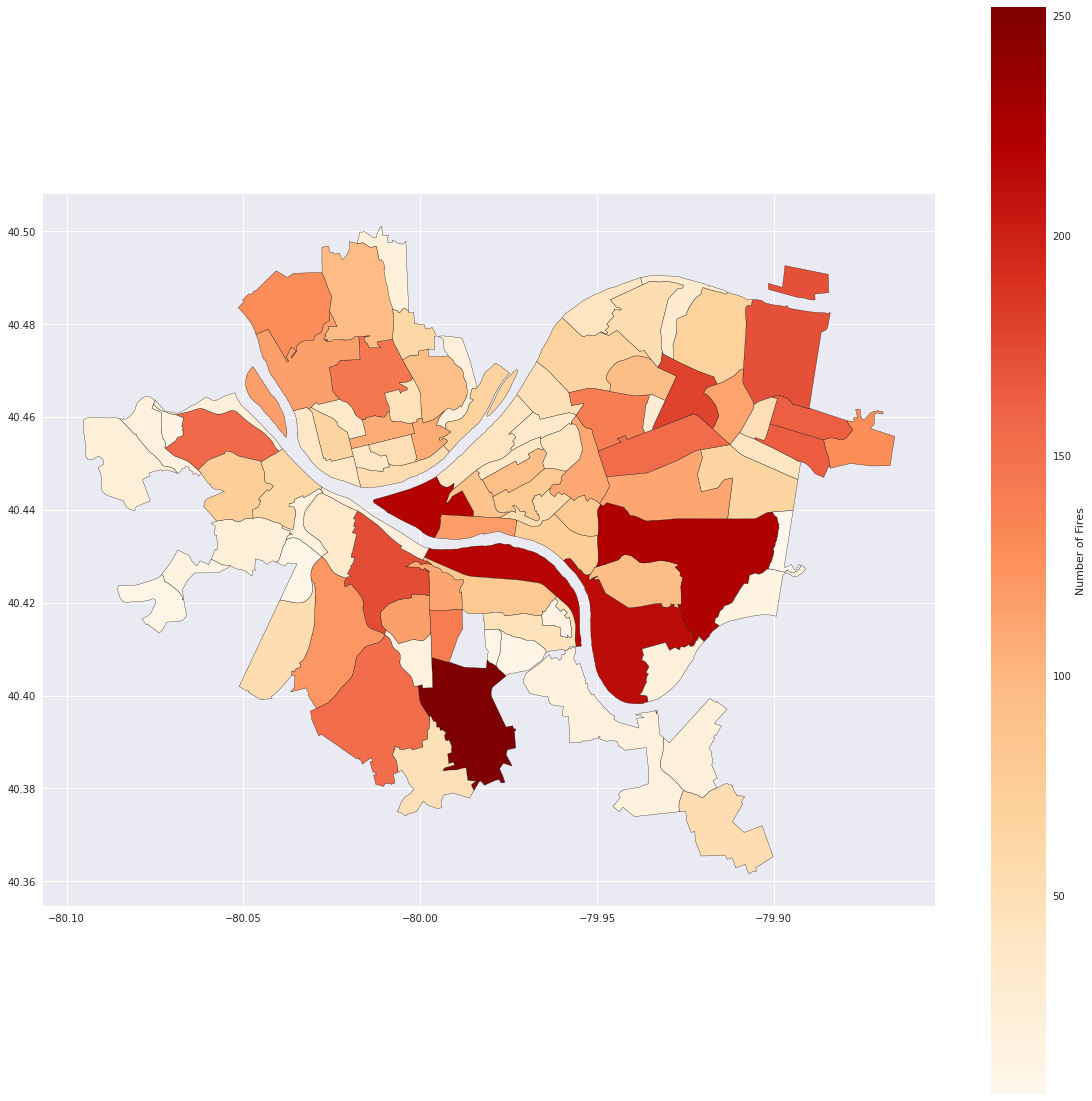

In [17]:
#Heat Map
count = 1
df["number_of_fires"] = count
num_fires = df.groupby("neighborhood").sum()['number_of_fires']
num_fires.sort_values(ascending=False)
neighborhoods = geopandas.read_file("Neighborhoods/Neighborhoods_.shp")
fire_map = neighborhoods.merge(num_fires, how='left', left_on='hood',right_on='neighborhood')
fire_map.plot(column='number_of_fires', cmap='OrRd', edgecolor="black", legend=True, legend_kwds = {'label': "Number of Fires"}, figsize=(20,20))

#### Data Limitations

One of the largest limitations of this data has to do with the fact that only fires that were responded to by the Pittsburgh Bureau of Fire are included in the dataset. This means that fires that were not discovered until they burnt out, or fires that the Bureau were not aware of are left out. It is likely that there a quite a few more fires that happened but were left out of the dataset.

#### Data Analysis

Since our group is using neighborhood saftey as the metric to determine the best neighborhood, we thought that the number of fire incidents would be a great indicator of saftey since it is reveals which neighborhoods are more prone to arson, fire accidents, or other incidents. Based on the data from this data set, the neighborhoods with the least amount of fire incidents are Regent Square, East Carnegie, Mt. Oliver, Ridgemont, and Saint Clair. The neighborhood with by far the most fire incidents is Carrick with over 250 reported incidents. When comparing this data to the other data sets, you find that the neighborhoods with not many fire incidents also have less crime aswell and vice versa for neighborhoods with many fire incidents. Therefore, when cross-refrencing the data sets, Mt. Oliver appears to be the safest neighborhood as it consistently comes in with the least amount of crime, arrests, and fire incidents.